<a href="https://colab.research.google.com/github/saketolfa/Neural-Network/blob/main/Coursera%20Assignments/Happy_or_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 4: Handling Complex Images - Happy or Sad Dataset**

We have the happy or sad dataset, which contains 80 images of emoji-like faces, 40 happy and 40 sad.


**Goal:** Create a convolutional neural network that trains to 99.9% accuracy on these images, which cancels training upon hitting this training accuracy threshold.



1.   **Import libraries**


In [ ]:

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import load_img ,img_to_array , ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras import optimizers, losses

<ol start = 2>
<li><b>Load and explore the datas </b></li>
</ol>



In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip

--2022-07-31 16:21:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.147.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘happy-or-sad.zip.2’

happy-or-sad.zip.2  100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2022-07-31 16:21:35 (173 MB/s) - ‘happy-or-sad.zip.2’ saved [2670333/2670333]



In [ ]:
# Unzipe the archive using the zipfile module

zip_path = './happy-or-sad.zip' # path
zip_ref = ZipFile(zip_path ,'r')
zip_ref.extractall('./data')
zip_ref.close() 


*********************************************************** 4 happy images *********************************************************** 



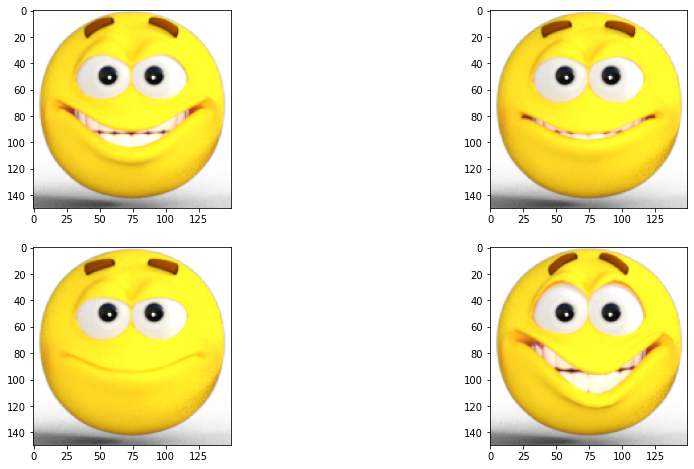


 *********************************************************** 4 sad images:***********************************************************



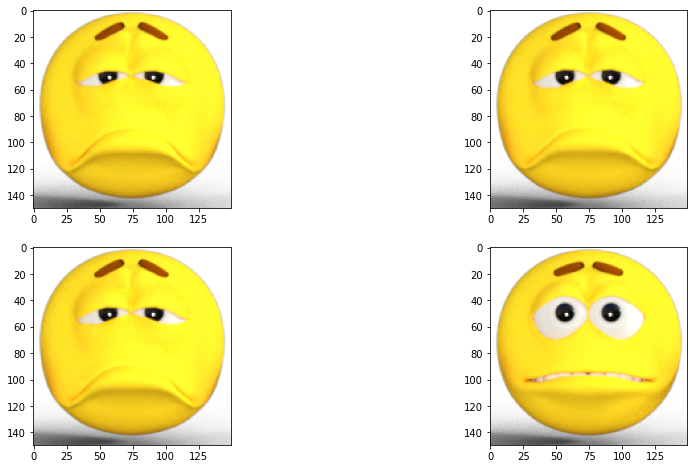

In [ ]:


base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("*********************************************************** 4 happy images *********************************************************** \n")
plt.figure(figsize=(15 , 8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(mpimg.imread(f"{os.path.join(happy_dir, os.listdir(happy_dir)[i])}"))

plt.show()


print("\n *********************************************************** 4 sad images:***********************************************************\n")  
plt.figure(figsize=(15 , 8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(mpimg.imread(f"{os.path.join(sad_dir, os.listdir(sad_dir)[i])}"))
  #plt.show()
  
plt.show()

In [ ]:
# the resolution of the image

# load the first example of a happy face 
sample_image = load_img(os.path.join(happy_dir , os.listdir(happy_dir)[0]))

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
print(f"Each image has shape :{sample_array.shape}")
print(f"the maximum pixal value used is :{np.max(sample_array)}")

Each image has shape :(150, 150, 3)
the maximum pixal value used is :255.0


<ol start = 3>
<li><b>Define the callback </b></li>
</ol>




In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch , legs={}):
    if legs.get('accuracy') is not None and legs.get('accuracy') >=0.999 :
      print("Reached 99.9% accuracy so cancelling the training !")
      # Stop training process
      self.model.stop_training = True


<ol start = 4>
<li><b>Pre-processing the data</b></li>
</ol>



In [ ]:
# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale= 1 / np.max(sample_array))

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory='./data/',
                                                        target_size=(150, 150),
                                                        batch_size=80,
                                                        class_mode='binary') # happy or sad
    ### END CODE HERE

    return train_generator

In [ ]:
# test image_generator method
train_gen = image_generator()

Found 80 images belonging to 2 classes.




<ol start = 5>
<li><b>Creating and training your model</b></li>
</ol>




In [ ]:


# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        # this is the first convolution
        tf.keras.layers.Conv2D(16 , (3,3) , activation='relu' , input_shape=(150 , 150 , 3)),
        tf.keras.layers.MaxPool2D(2,2),
        # this is the second convolution
        tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        # this is the third convolution
        tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),


        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128 , activation = 'relu'),
        tf.keras.layers.Dense(1 , activation = 'sigmoid')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.RMSprop(learning_rate = 0.001),
                  metrics=['accuracy']) 
    


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(x=train_generator,        
                        epochs=15,
                        callbacks=[callbacks]
                       ) 
    
   
    ### END CODE HERE
    return history , model

In [ ]:
history , model = train_happy_sad_model(train_gen)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.6876 - accuracy: 0.6500
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 2.5411 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 1.1150 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 2s 2s/step - loss: 0.6726 - accuracy: 0.6375
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 0.6330 - accuracy: 0.9375
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 0.5834 - accuracy: 0.9750
Epoch 7/15
1/1 [==============================] - 2s 2s/step - loss: 0.5161 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
len(history.epoch)
print(f'your model reached the desired accuracy after {len(history.epoch)} epochs')

your model reached the desired accuracy after 7 epochs


In [ ]:
if not 'accuracy' in history.model.metrics_names:
  print("Use 'accuracy' as metric when compiling your model.")

else:
  print('Great , the metric was correctly defined.')

Great , the metric was correctly defined.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


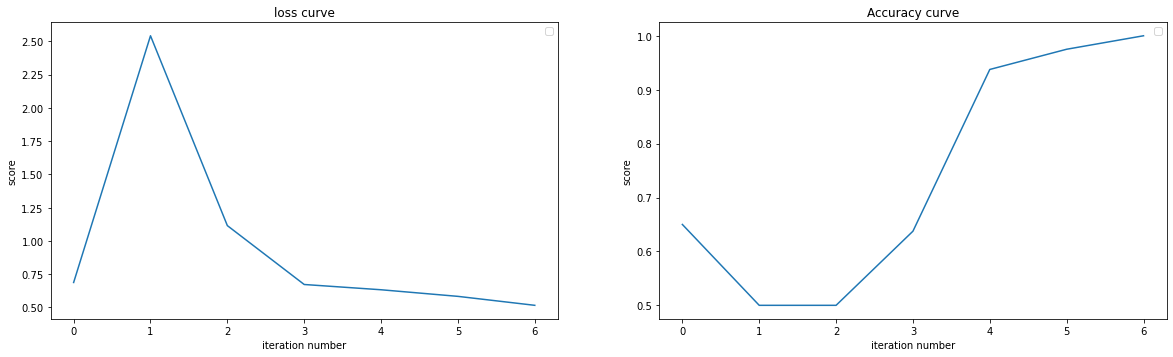

In [ ]:
# Training track
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.title('loss curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.legend()
plt.subplot(2,2,2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.legend()
plt.show()

<ol start = 6>
<li><b>Validation with some image of pixabay</b></li>
</ol>



In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/tmp/images/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)
    
  if classes[0]>0.5:
    print(fn + " is a happy emoji")
  else:
    print(fn + " is a sad emoji")

Saving Slightly_Smiling_Face_Emoji_87fdae9b-b2af-4619-a37f-e484c5e2e7a4_grande.png to Slightly_Smiling_Face_Emoji_87fdae9b-b2af-4619-a37f-e484c5e2e7a4_grande (1).png
[[0.6763556]]
Slightly_Smiling_Face_Emoji_87fdae9b-b2af-4619-a37f-e484c5e2e7a4_grande.png is a happy emoji


In [ ]:
import base64

encoded_answer = "ClNvbWUgaGVscGZ1bCB0aXBzIGluIGNhc2UgeW91IGFyZSBzdHVjazoKCiAgICAtIEEgZ29vZCBmaXJzdCBsYXllciB3b3VsZCBiZSBhIENvbnYyRCBsYXllciB3aXRoIGFuIGlucHV0IHNoYXBlIHRoYXQgbWF0Y2hlcyAKICAgIHRoYXQgb2YgZXZlcnkgaW1hZ2UgaW4gdGhlIHRyYWluaW5nIHNldCAoaW5jbHVkaW5nIHRoZSBjb2xvciBkaW1lbnNpb24pCiAgICAKICAgIC0gVGhlIG1vZGVsIHdpbGwgd29yayBiZXN0IHdpdGggMyBjb252b2x1dGlvbmFsIGxheWVycwogICAgCiAgICAtIFRoZXJlIHNob3VsZCBiZSBhIEZsYXR0ZW4gbGF5ZXIgaW4gYmV0d2VlbiBjb252b2x1dGlvbmFsIGFuZCBkZW5zZSBsYXllcnMKICAgIAogICAgLSBUaGUgZmluYWwgbGF5ZXIgc2hvdWxkIGJlIGEgRGVuc2UgbGF5ZXIgd2l0aCB0aGUgbnVtYmVyIG9mIHVuaXRzIGFuZCAKICAgIGFjdGl2YXRpb24gZnVuY3Rpb24gdGhhdCBzdXBwb3J0cyBiaW5hcnkgY2xhc3NpZmljYXRpb24uCg=="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)


Some helpful tips in case you are stuck:

    - A good first layer would be a Conv2D layer with an input shape that matches 
    that of every image in the training set (including the color dimension)
    
    - The model will work best with 3 convolutional layers
    
    - There should be a Flatten layer in between convolutional and dense layers
    
    - The final layer should be a Dense layer with the number of units and 
    activation function that supports binary classification.

